In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("data/train.csv", index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
# Get some info on the dataset distribution
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Data exploration

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

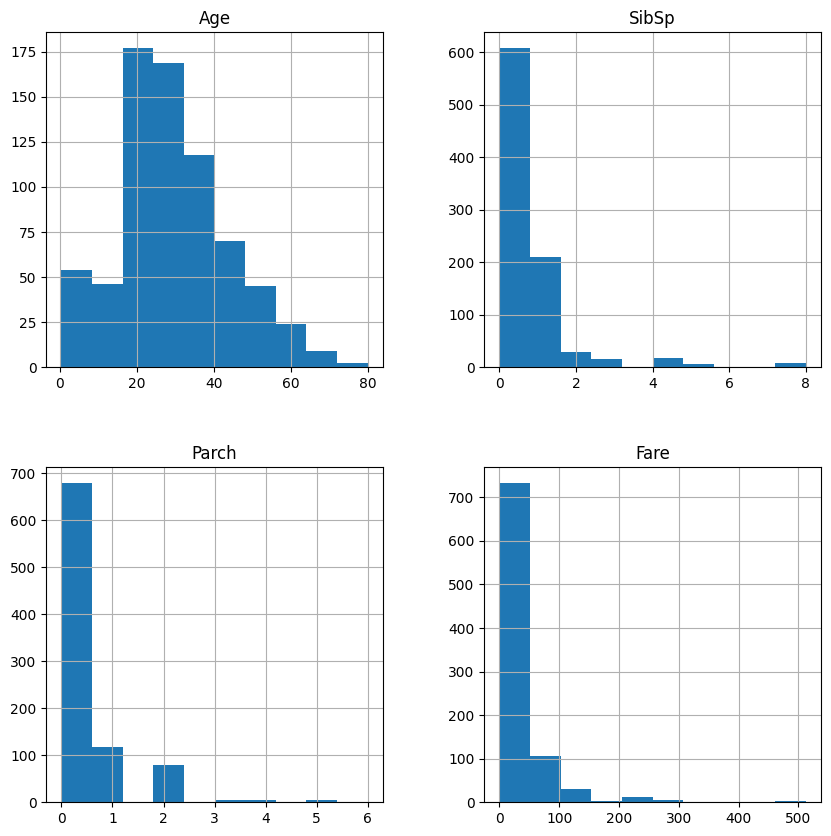

In [7]:
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

#distributions for all numeric variables 
df_num.hist(figsize=(10, 10))


            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

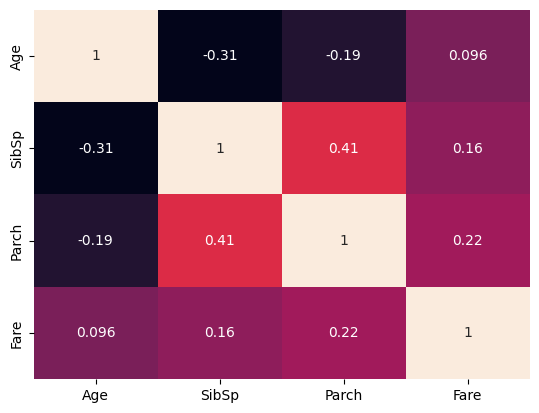

In [8]:
print(df_num.corr())
sns.heatmap(df_num.corr(), annot=True, cbar=False)

In [9]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


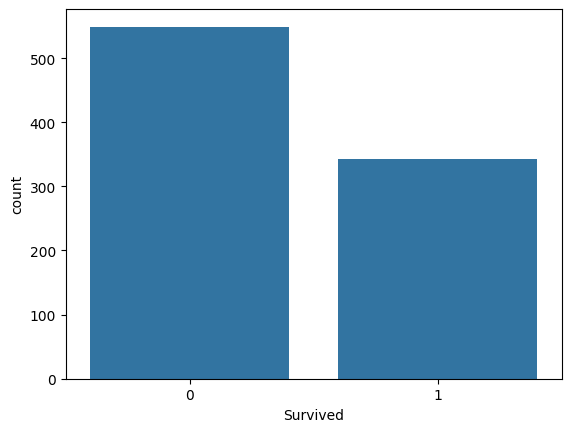

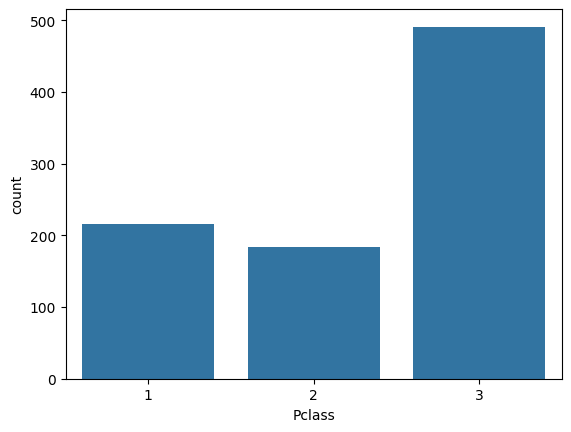

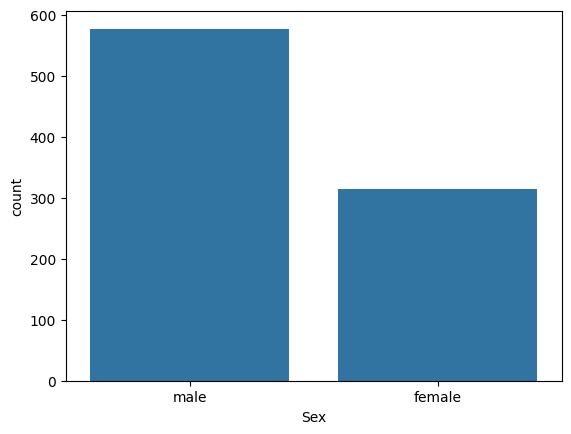

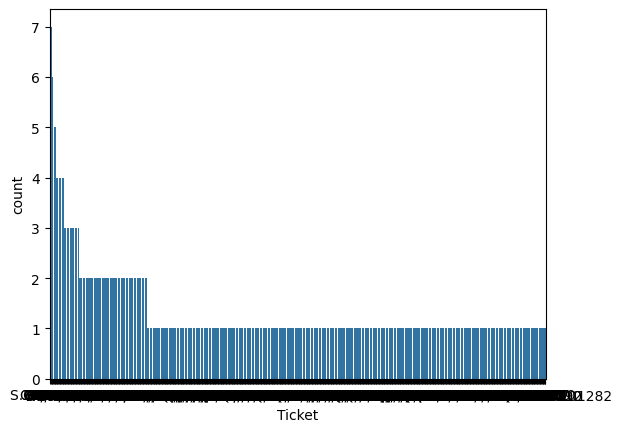

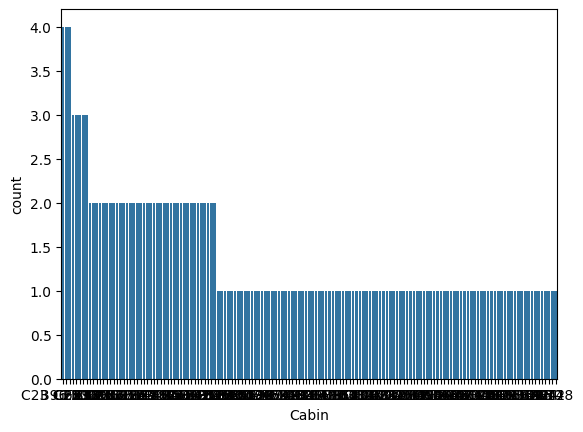

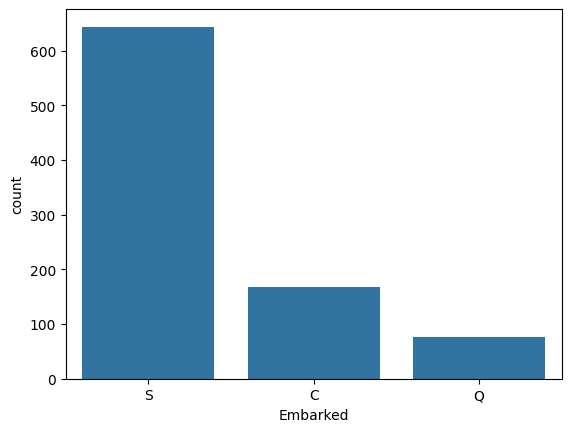

In [10]:
# We look at the categorical variables using barplots
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

In [11]:
# Comparing survival and each of these categorical variables 
# We count the number fror each variable using the Ticket variable to allow the count. Ticket is chosen here because each passenger has one and only one ticket
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Feature Engineering¶


In [12]:
# Some work needs to be done on cabin, name and ticket to see if those variables coud be useful
# After a quick study, we can tell that Name and Ticket variables can be dropped as they provide little information and the amount of data is limited

# We check here if someone booking several cabins could have an impact on their chance of survival 
df['cabin_multiple'] = df["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
print(df['cabin_multiple'].value_counts())
pd.pivot_table(df, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64


cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [13]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

#comparing surivial rate by cabin
print(df.cabin_adv.value_counts())
pd.pivot_table(df,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


# Data Preprocessing for Model¶

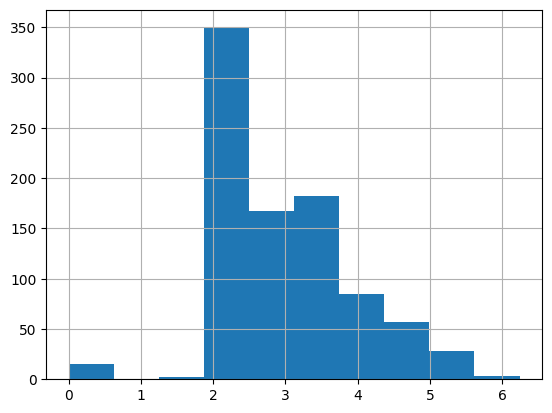

In [14]:
#create all categorical variables that we did above for both training and test sets 
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
df.Age = df.Age.fillna(df.Age.median())
df.Fare = df.Fare.fillna(df.Fare.mean())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
df.dropna(subset=['Embarked'],inplace = True)

df = df.drop('Ticket', axis=1)
df = df.drop('Name', axis=1)

# log norm of fare (used)
df['norm_fare'] = np.log(df.Fare+1)
df['norm_fare'].hist()

# converted Pclass to category for pd.get_dummies()
df.Pclass = df.Pclass.astype(str)

#created dummy variables from categories
df_dummies = pd.get_dummies(df)

In [15]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_dummies_scaled = df_dummies.copy()
df_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(df_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
df_dummies_scaled.describe()

,Survived,Age,SibSp,Parch,Fare,cabin_multiple,norm_fare
count,889.000000,8.890000e+02,8.890000e+02,8.890000e+02,889.000000,889.000000,8.890000e+02
mean,0.382452,2.717486e-16,-3.197043e-17,-4.795564e-17,32.096681,0.265467,-2.882334e-16
std,0.486260,1.000563e+00,1.000563e+00,1.000563e+00,49.697504,0.546642,1.000563e+00
min,0.000000,-2.226536e+00,-4.751991e-01,-4.743259e-01,0.000000,0.000000,-3.059355e+00
25%,0.000000,-5.636741e-01,-4.751991e-01,-4.743259e-01,7.895800,0.000000,-7.996695e-01
50%,0.000000,-1.013399e-01,-4.751991e-01,-4.743259e-01,14.454200,0.000000,-2.286411e-01
75%,1.000000,4.380499e-01,4.313502e-01,-4.743259e-01,31.000000,0.000000,5.238932e-01
max,1.000000,3.905556e+00,6.777195e+00,6.967010e+00,512.329200,4.000000,3.393172e+00


In [16]:
# # # Balance the training set
# # majority_class = df[df['Survived'] == 0]
# # minority_class = df[df['Survived'] == 1]

# # # Oversample the minority class
# # minority_class_0_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=52)

# # # Concatenate oversampled minority classes with majority class
# # df_balanced = pd.concat([majority_class, minority_class_0_oversampled])

# # # Shuffle the balanced dataset
# # df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# # df_balanced.head()
# # df_balanced['Survived'].value_counts()
# df_balanced = df

In [17]:
# # Drop the Sex_female variable as it carries the same information as Sex_male
# df_dummies = df_dummies.drop('Sex_female', axis=1)

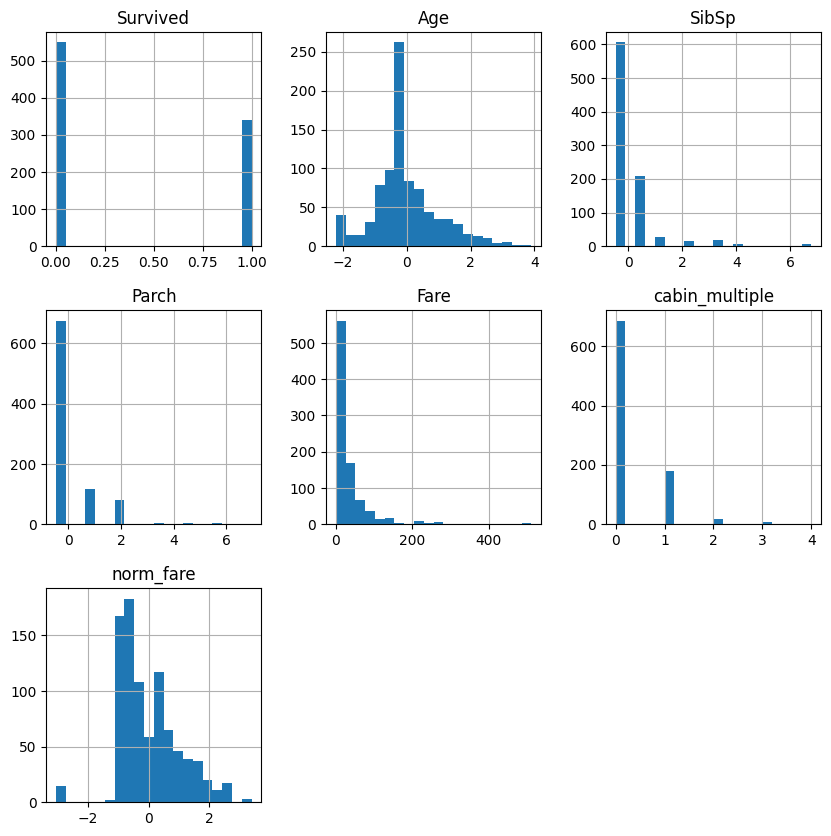

In [18]:
df_dummies_scaled.hist(bins=20, figsize=(10, 10))
plt.show()

# Model building

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [20]:
y_train = df_dummies_scaled['Survived']
X_train_scaled = df_dummies_scaled.drop('Survived', axis=1)
X_train = df_dummies.drop('Survived', axis=1)
X_train_scaled.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Columns: 186 entries, Age to name_title_the Countess
dtypes: bool(180), float64(5), int64(1)
memory usage: 204.9 KB
<class 'pandas.core.series.Series'>
Index: 889 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype
--------------  -----
889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [21]:
# Use Naive Bayes as a baseline for classification tasks 
print("=========== GaussianNB ===========")
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== LogisticRegression ===========")
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== LogisticRegression scaled ===========")
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== DecisionTreeClassifier ===========")
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== DecisionTreeClassifier scaled ===========")
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== KNeighborsClassifier ===========")
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== KNeighborsClassifier scaled ===========")
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== RandomForestClassifier ===========")
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== RandomForestClassifier scaled ===========")
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== SVC ===========")
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== SVC scaled ===========")
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== XGBClassifier ===========")
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

print("=========== XGBClassifier scaled ===========")
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

=========== GaussianNB ===========
[0.64044944 0.64606742 0.6741573  0.6741573  0.67231638]
0.6614295689709897
=========== LogisticRegression ===========
[0.82022472 0.81460674 0.80337079 0.82022472 0.85310734]
0.8223068621849807
=========== LogisticRegression scaled ===========
[0.82022472 0.81460674 0.80337079 0.82022472 0.85310734]
0.8223068621849807
=========== DecisionTreeClassifier ===========
[0.78089888 0.78651685 0.83707865 0.76404494 0.8079096 ]
0.7952897860724942
=========== DecisionTreeClassifier scaled ===========
[0.78651685 0.78651685 0.83707865 0.75842697 0.8079096 ]
0.7952897860724942
=========== KNeighborsClassifier ===========


C:\Users\Stev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Stev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.1008.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 554, in run
    with Pop

[0.68539326 0.70224719 0.74719101 0.7247191  0.74011299]
0.7199327112296071
=========== KNeighborsClassifier scaled ===========
[0.73595506 0.74719101 0.82022472 0.73033708 0.80225989]
0.7671935504348377
=========== RandomForestClassifier ===========
[0.8258427  0.79213483 0.84831461 0.75280899 0.81920904]
0.8076620326287056
=========== RandomForestClassifier scaled ===========
[0.82022472 0.78651685 0.84269663 0.75280899 0.81920904]
0.8042912461118517
=========== SVC ===========
[0.60674157 0.71348315 0.68539326 0.68539326 0.68926554]
0.676055354535644
=========== SVC scaled ===========
[0.57865169 0.71348315 0.67977528 0.68539326 0.68361582]
0.6681838379991113
=========== XGBClassifier ===========
[0.83707865 0.80898876 0.87078652 0.79775281 0.84180791]
0.8312829302355107
=========== XGBClassifier scaled ===========
[0.83707865 0.80898876 0.87078652 0.79775281 0.84180791]
0.8312829302355107


In [22]:
# Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
# A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [23]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78651685 0.80898876 0.86516854 0.80898876 0.84745763]
0.8234241096933917


# Model Tuned Performance¶

In [24]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [27]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [28]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8245604011934236
Best Parameters: {'C': np.float64(4.281332398719396), 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [29]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')


Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.7986986605725894
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [ ]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

In [37]:
#Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model. I took the best model from this and did a more granular search 
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['sqrt', 'log2', None],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8414270297721069
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'bootstrap': True}


In [39]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [300,350,400,450],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [9, 10, 11],
                                  'max_features': [None],
                                  'min_samples_leaf': [1],
                                  'min_samples_split': [2]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest
Best Score: 0.847032311305783
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350}


<Axes: >

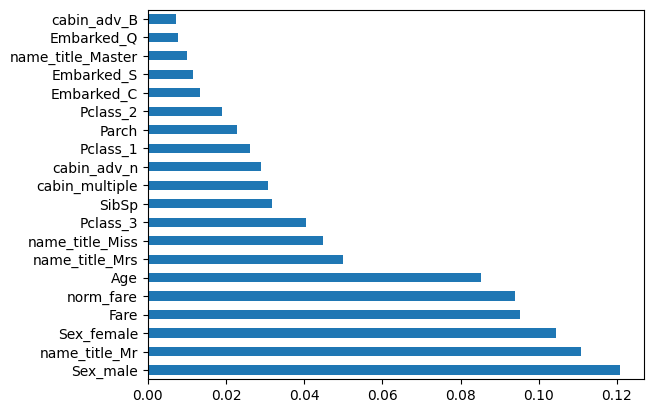

In [33]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [36]:
xgb = XGBClassifier(tree_method='hist', device='cuda', random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

#clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
#best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
#clf_performance(best_clf_xgb,'XGB')
clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
XGB
Best Score: 0.8526375928394593
Best Parameters: {'subsample': 0.5, 'sampling_method': 'gradient_based', 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 100, 'min_child_weight': 0.1, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.2}


In [39]:
xgb = XGBClassifier(tree_method='hist', device='cuda', random_state = 1)

param_grid = {
    'n_estimators': [75, 100, 150],
    'colsample_bytree': [0.15, 0.2, 0.25],
    'max_depth': [13, 15],
    'reg_alpha': [0.5],
    'reg_lambda': [1.5, 2, 2.5],
    'subsample': [0.45, 0.5, .55],
    'learning_rate':[0.2],
    'gamma':[0, .5],
    'min_child_weight':[0.1],
    'sampling_method': ['gradient_based']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
XGB
Best Score: 0.8560210753507269
Best Parameters: {'colsample_bytree': 0.2, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 15, 'min_child_weight': 0.1, 'n_estimators': 150, 'reg_alpha': 0.5, 'reg_lambda': 1.5, 'sampling_method': 'gradient_based', 'subsample': 0.5}


{'colsample_bytree': 0.2, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 15, 'min_child_weight': 0.1, 'n_estimators': 150, 'reg_alpha': 0.5, 'reg_lambda': 1.5, 'sampling_method': 'gradient_based', 'subsample': 0.5}

# Model Additional Ensemble Approaches

In [ ]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())

In [41]:
X_train, X_internal_eval, Y_train, Y_internal_eval = train_test_split(X, Y, test_size=0.20, random_state=42)

model = XGBClassifier()

model.fit(X_train, Y_train)

Y_internal_eval_pred = model.predict(X_internal_eval)

unique_labels, counts = np.unique(Y_internal_eval_pred, return_counts=True)

# Display the amount of each label predicted
for label, count in zip(unique_labels, counts):
    print(f'Label {label}: {count} occurrences')

NameError: name 'X' is not defined

In [ ]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=43)

# Hyperparameter grid to explore
# The gird has been changed several times to find the value for each hyperparameters
param_grids = [{
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1]},
    {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.4]},
    {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]},
    {
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 1]
    }
]

for grid in param_grids:
    model = XGBClassifier()

    grid_search = GridSearchCV(model, grid, scoring='accuracy', cv=kf, verbose=1)

    grid_search.fit(X_train, Y_train)

    # Display the best hyperparameters found
    print("Meilleurs hyperparamètres :", grid_search.best_params_)

best_model = grid_search.best_estimator_

Y_internal_eval_pred = best_model.predict(X_internal_eval)

# Compute the accuracy when using the best hyperparameters
accuracy_internal = accuracy_score(Y_internal_eval, Y_internal_eval_pred)
print(f'Accuracy (Internal Evaluation): {accuracy_internal}')



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs hyperparamètres : {'learning_rate': 0.01, 'n_estimators': 1000}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs hyperparamètres : {'gamma': 0.2, 'max_depth': 9, 'min_child_weight': 3}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Meilleurs hyperparamètres : {'colsample_bytree': 1.0, 'subsample': 0.6}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Meilleurs hyperparamètres : {'alpha': 1, 'lambda': 1}
Accuracy (Internal Evaluation): 0.7921348314606742


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

# Define the hyperparameters found previously
best_hyperparameters = {
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 9,
    'min_child_weight': 3,
    'gamma': 0.2,
    'subsample': 1,
    'colsample_bytree': 0.6,
    'lambda': 1,
    'alpha': 1
}
model = XGBClassifier(**best_hyperparameters)

k = 5

# Initialize the k-fold cross validation
kf = KFold(n_splits=k, shuffle=True, random_state=39)

# Do the cross validation to make sure that our model and the hyperparameters works for different validation sets
scores = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')

# Display the accuracy for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score}')

# Display the average accuracy
print(f'Average accuracy: {scores.mean()}')

Fold 1: Accuracy = 0.848314606741573
Fold 2: Accuracy = 0.8202247191011236
Fold 3: Accuracy = 0.8539325842696629
Fold 4: Accuracy = 0.8033707865168539
Fold 5: Accuracy = 0.8192090395480226
Average accuracy: 0.8290103472354472


# Inference on the evaluation dataset

In [24]:
X_eval = pd.read_csv("data/test.csv", index_col=0)

X_eval['cabin_multiple'] = X_eval.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
X_eval['cabin_adv'] = X_eval.Cabin.apply(lambda x: str(x)[0])
X_eval['name_title'] = X_eval.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
X_eval.Age = X_eval.Age.fillna(df.Age.median())
X_eval.Fare = X_eval.Fare.fillna(df.Fare.mean())

X_eval = X_eval.drop('Ticket', axis=1)
X_eval = X_eval.drop('Name', axis=1)

# log norm of fare (used)
X_eval['norm_fare'] = np.log(X_eval.Fare+1)

# converted Pclass to category for pd.get_dummies()
X_eval.Pclass = X_eval.Pclass.astype(str)

#created dummy variables from categories
X_eval = pd.get_dummies(X_eval)
X_eval.info()
X_eval.describe()

X_eval = X_eval.reindex(columns=X_train.columns, fill_value=0)

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Columns: 107 entries, Age to name_title_Rev
dtypes: bool(101), float64(3), int64(3)
memory usage: 64.1 KB


In [25]:
print("Colonnes de l'ensemble d'évaluation:", X_eval.columns)
print("Colonnes de l'ensemble d'entraînement:", df_dummies.columns)

Colonnes de l'ensemble d'évaluation: Index(['Age', 'SibSp', 'Parch', 'Fare', 'cabin_multiple', 'norm_fare',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       ...
       'name_title_Master', 'name_title_Miss', 'name_title_Mlle',
       'name_title_Mme', 'name_title_Mr', 'name_title_Mrs', 'name_title_Ms',
       'name_title_Rev', 'name_title_Sir', 'name_title_the Countess'],
      dtype='object', length=186)
Colonnes de l'ensemble d'entraînement: Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_multiple',
       'norm_fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       ...
       'name_title_Master', 'name_title_Miss', 'name_title_Mlle',
       'name_title_Mme', 'name_title_Mr', 'name_title_Mrs', 'name_title_Ms',
       'name_title_Rev', 'name_title_Sir', 'name_title_the Countess'],
      dtype='object', length=187)


In [28]:
# model = XGBClassifier(**best_hyperparameters)
param_grid =  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350}
model = RandomForestClassifier(random_state = 1, **param_grid)
model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       n_estimators=350, random_state=1)

In [29]:
predictions = model.predict(X_eval)

passenger_ids = X_eval.index
output = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

# Save to CSV
output_file_path = "predictions.csv"
output.to_csv(output_file_path, index=False)